<a href="https://colab.research.google.com/github/jrhumberto/cd/blob/main/parte1_analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suport Vector Machine (SVM)

## 1 - A partir daqui apresentamos os bancos de dados utilizados para análise de sentimentos. O objetivo final é o treinamento de um classificador  inicialmente focado para o português. O repositório correspondente a essa implementação é  clonado do github para utilização do dataset contido no arquivo ".csv" através da biblioteca Pandas.

In [ ]:
!git clone https://github.com/LucaswasTaken/Acessibilidade_Parte_1_Analise_de_Sentimentos.git

Cloning into 'Caffe_Analise_de_Sentimentos'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 76 (delta 36), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Caffe_Analise_de_Sentimentos/dataset_sentimentos_augmented.csv').dropna()

In [ ]:
data

,Unnamed: 0,Frase,Sentimento
0,0,não precisei pagar o ingresso,alegria
1,1,se eu ajeitar tudo fica bem,alegria
2,2,minha fortuna ultrapassa a sua,alegria
3,3,sou muito afortunado,alegria
4,4,e benefico para todos esta nova medida,alegria
...,...,...,...
220,220,como com a compulsão após a depressão,tristeza
221,221,Estou me desencorajando de viver,tristeza
222,222,ele desencoraja meus desejos,tristeza
223,223,isto é deprimente por dentro,tristeza


In [ ]:
data['Sentimento'].unique()

array(['alegria', 'raiva', 'tristeza'], dtype=object)

## 2 - Tratamento e tokenização vetorial dos dados

Remoção das stopwords, pontuação e acentos

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 4.6MB/s 


In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from unidecode import unidecode


clean_text = []
for text in data['Frase']:
  text = unidecode(text.lower())
  text= re.sub(r'\[[0-9]*\]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text )
  text = re.sub(r'\s+', ' ', text)  
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  clean_text.append(text)

data['clean_text'] = clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
y = data['Sentimento']
X = data['clean_text']

Separação de dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tokenização e aplicação da vetorização TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words = stopwords.words('portuguese'))
X_train_tf = tf.fit_transform(X_train) # ler vocabulario e vetorizar o corpus
X_test_tf = tf.transform(X_test) # transformar o vocabulario de teste a partir da emsma transformação
# dimensões do vetor de treinamento
print(X_train_tf.toarray().shape)

(180, 331)


## 3 - Treinamento do classificador SVM

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_tf, y_train)

y_train_svm_nb = clf.predict(X_train_tf)
y_pred_svm_nb = clf.predict(X_test_tf)

## 4 - Avaliação da matriz de confusão e métricas para o conjunto de treinamento e de testes

Conjunto de treinamento

F1 Score:  1.0
Accuracy:  1.0
Precision:  1.0


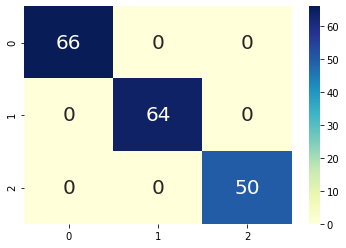

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_train, y_train_svm_nb)
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print('F1 Score: ', f1_score(y_train, y_train_svm_nb, average='macro'))
print('Accuracy: ', accuracy_score(y_train, y_train_svm_nb))
print('Precision: ', precision_score(y_train, y_train_svm_nb, average='macro'))

Conjunto de testes

F1 Score:  0.8076190476190476
Accuracy:  0.8
Precision:  0.8636363636363636


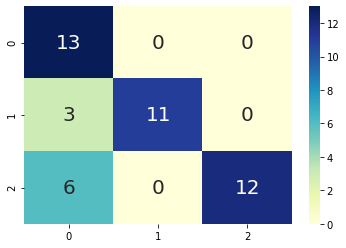

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_test, y_pred_svm_nb)
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print('F1 Score: ', f1_score(y_test, y_pred_svm_nb, average='macro'))
print('Accuracy: ', accuracy_score(y_test, y_pred_svm_nb))
print('Precision: ', precision_score(y_test, y_pred_svm_nb, average='macro'))

# Rede profunda baseada em LSTM

## 1 - A partir daqui apresentamos os bancos de dados utilizados para análise de sentimentos. O objetivo final é o treinamento de um classificador  inicialmente focado para o português. O repositório correspondente a essa implementação é  clonado do github para utilização do dataset contido no arquivo ".csv" através da biblioteca Pandas.

In [ ]:
!git clone https://github.com/LucaswasTaken/Acessibilidade_Parte_1_Analise_de_Sentimentos.git

Cloning into 'Acessibilidade_Parte_1_Analise_de_Sentimentos'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 103 (delta 49), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (103/103), 652.00 KiB | 6.52 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Acessibilidade_Parte_1_Analise_de_Sentimentos/dataset_sentimentos_augmented.csv').dropna()

In [ ]:
data

,Unnamed: 0,Frase,Sentimento
0,0,não precisei pagar o ingresso,alegria
1,1,se eu ajeitar tudo fica bem,alegria
2,2,minha fortuna ultrapassa a sua,alegria
3,3,sou muito afortunado,alegria
4,4,e benefico para todos esta nova medida,alegria
...,...,...,...
220,220,como com a compulsão após a depressão,tristeza
221,221,Estou me desencorajando de viver,tristeza
222,222,ele desencoraja meus desejos,tristeza
223,223,isto é deprimente por dentro,tristeza


In [ ]:
data['Sentimento'].unique()

array(['alegria', 'raiva', 'tristeza'], dtype=object)

## 2 - Tratamento e tokenização vetorial dos dados

Remoção das stopwords, pontuação e acentos

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 3.4MB/s 


In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from unidecode import unidecode
from tensorflow.keras.preprocessing.sequence import pad_sequences

clean_text = []
for text in data['Frase']:
  text = unidecode(text.lower())
  text= re.sub(r'\[[0-9]*\]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text )
  text = re.sub(r'\s+', ' ', text)  
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  clean_text.append(text)

data['clean_text'] = clean_text

y = []
for i in range(len(data['Sentimento'])):
  if(data['Sentimento'].iloc[i]=='alegria'):
    y.append(2)
  elif(data['Sentimento'].iloc[i]=='tristeza'):
    y.append(1)
  else:
    y.append(0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 3 - Geração das sequencias utilizadas pela rede LSTM recorrente

In [ ]:
import pickle
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

class Preprocessing(): 
    def __init__(self,input_text,categorias):
        self.data = input_text
        self.classes = categorias
        self.vocab_size = None
        self.encoded_data = None
        self.max_length = None
        self.sequences = None
        self.sequencesy = None
        self.x = None
        self.y = None
        self.tokenizer = None
        
    def encode_data(self):
        self.tokenizer = Tokenizer()
        self.tokenizer.fit_on_texts(self.data)
        with open('tokenizer.pickle', 'wb') as handle:
          pickle.dump(self.tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        self.encoded_data = self.tokenizer.texts_to_sequences(self.data)
        # print(self.encoded_data)
        self.vocab_size = len(self.tokenizer.word_counts)+1

    def generate_sequence(self):
        seq_list = list()
        seq_listy = list()
        for i in range(len(self.encoded_data)):
            item = self.encoded_data[i]
            l = len(item)
            for id in range(1,l):
                seq_list.append(item[:id+1])
                seq_listy.append(self.classes[i])
        self.max_length = max([len(seq) for seq in seq_list])
        self.sequences = pad_sequences(seq_list, maxlen=self.max_length, padding='pre')
        self.sequences = np.array(self.sequences)
        print(self.sequences)
        self.sequencesy  = seq_listy
    def get_data(self):
        self.x = self.sequences
        self.y = self.sequencesy
        self.y = to_categorical(self.y,num_classes=3)

In [ ]:
pr = Preprocessing(data['clean_text'].values,y)
pr.encode_data()
pr.generate_sequence()
pr.get_data()

[[  0   0   0 ...   0   3 230]
 [  0   0   0 ...   3 230  63]
 [  0   0   0 ... 230  63   5]
 ...
 [  0   0   0 ... 226   9  82]
 [  0   0   0 ...   9  82   2]
 [  0   0   0 ...  82   2 227]]


## 4 - Criando modelo LSTM para treinamento e separação de dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
class Model():
    def __init__(self):
        self.model = None
        self.history = None
        self.x = None
        self.y = None
        self.input_train = None
        self.input_test = None
        self.output_train = None
        self.output_test = None
        self.vocab_size = pr.vocab_size
        self.max_len = pr.max_length
        
        
    def create_model(self):
        self.model = Sequential()
        self.model.add(Embedding(self.vocab_size,10,input_length=self.max_len))
        self.model.add(LSTM(100))
        self.model.add(Dropout(0.1))
        self.model.add(Dense(3,activation='softmax'))
        self.model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        print(self.model.summary())
    def run(self,epochs,batch_size):
        seed = 7
        np.random.seed(seed)
        self.input_train, self.input_test, self.output_train, self.output_test = train_test_split(self.x, self.y, test_size=0.2, random_state=seed, stratify=self.y)
        self.history = self.model.fit(self.input_train, self.output_train,validation_data=(self.input_test,self.output_test), epochs=epochs,batch_size=batch_size,validation_split=0.2)
        
    def save(self):
        self.model.save("class_prediction_model.h5")

In [ ]:
model_obj = Model()
model_obj.x = pr.x
model_obj.y = pr.y
model_obj.create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 10)            4390      
_________________________________________________________________
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 49,093
Trainable params: 49,093
Non-trainable params: 0
_________________________________________________________________
None


##5 - Treinamento do modelo LSTM

In [ ]:
model_obj.run(30,100)
model_obj.save()

Epoch 1/5
7/7 [==============================] - 0s 25ms/step - loss: 0.2265 - accuracy: 0.9242 - val_loss: 0.2352 - val_accuracy: 0.9273
Epoch 2/5
7/7 [==============================] - 0s 21ms/step - loss: 0.2041 - accuracy: 0.9348 - val_loss: 0.1740 - val_accuracy: 0.9273
Epoch 3/5
7/7 [==============================] - 0s 22ms/step - loss: 0.1621 - accuracy: 0.9470 - val_loss: 0.1724 - val_accuracy: 0.9212
Epoch 4/5
7/7 [==============================] - 0s 21ms/step - loss: 0.1643 - accuracy: 0.9364 - val_loss: 0.1530 - val_accuracy: 0.9394
Epoch 5/5
7/7 [==============================] - 0s 24ms/step - loss: 0.1591 - accuracy: 0.9439 - val_loss: 0.1523 - val_accuracy: 0.9455


In [ ]:
model_obj.output_test[2]

array([1., 0., 0.], dtype=float32)

##6 - Predição dos dados de teste e métricas de avaliação

In [ ]:
class Prediction():
    def __init__(self,tokenizer,max_len):
        self.model = None
        self.tokenizer = tokenizer
        self.idx2word = {v:k for k,v in self.tokenizer.word_index.items()}
        self.max_length = max_len+1
    
    def load_model(self):
        self.model = load_model("class_prediction_model.h5")
        
    def predict_words(self,encoded_data,num_words):
        padded_data = pad_sequences([encoded_data],maxlen = self.max_length-1,padding='pre')
        y_preds = self.model.predict(padded_data)
        return y_preds

In [ ]:
from tensorflow.keras.models import load_model
pred = Prediction(pr.tokenizer,pr.max_length)    
pred.load_model()

F1 Score:  0.9152969363846166
Accuracy:  0.9178743961352657
Precision:  0.9181547200145129


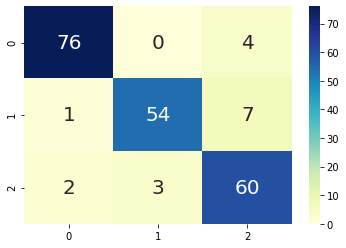

In [ ]:
y_pred_class = []
y_real_clas = []
for i in range(len(model_obj.output_test)):
  y_pred = pred.predict_words(model_obj.input_test[i],1)
  y_pred_class.append(np.argmax(y_pred))
  y_real_clas.append(np.argmax(model_obj.output_test[i]))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_real_clas, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print('F1 Score: ', f1_score(y_real_clas, y_pred_class, average='macro'))
print('Accuracy: ', accuracy_score(y_real_clas, y_pred_class))
print('Precision: ', precision_score(y_real_clas, y_pred_class, average='macro'))

# Bert

## 1 -As primeiras celulas apresentam as configurações do Bert.

In [ ]:
!pip install transformers

  Using cached https://files.pythonhosted.org/packages/19/22/aff234f4a841f8999e68a7a94bdd4b60b4cebcfeca5d67d61cd08c9179de/transformers-3.3.1-py3-none-any.whl
     |████████████████████████████████| 890kB 3.1MB/s 
     |████████████████████████████████| 3.0MB 24.6MB/s 
     |████████████████████████████████| 1.1MB 48.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5455bb1f83c3967227b0b083010b8b5bedffd1a252885292e7646a700fe8f41d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import tensorflow as tf
import transformers #importando o pacote para uso de transformer  (bert)

# Tentando detectar o hardware. O Bert funcionará melhor se a placa de vídeo for uma TPU ou tiver tensor cores
# Tentativa de detecção da TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)


#Caso não ache a TPU, utilizar dispositivo disponível
else:
    strategy = tf.distribute.get_strategy()
print("REPLICAS: ", strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  grpc://10.15.160.218:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.15.160.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.15.160.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


## 2 - A partir daqui apresentamos os bancos de dados utilizados para análise de sentimentos. O objetivo final é o treinamento de um classificador  inicialmente focado para o português. O repositório correspondente a essa implementação é  clonado do github para utilização do dataset contido no arquivo ".csv" através da biblioteca Pandas.

In [ ]:
!git clone https://github.com/LucaswasTaken/Acessibilidade_Parte_1_Analise_de_Sentimentos.git

fatal: destination path 'Caffe_Analise_de_Sentimentos' already exists and is not an empty directory.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Caffe_Analise_de_Sentimentos/dataset_sentimentos_augmented.csv').dropna()

In [ ]:
data

,Unnamed: 0,Frase,Sentimento
0,0,não precisei pagar o ingresso,alegria
1,1,se eu ajeitar tudo fica bem,alegria
2,2,minha fortuna ultrapassa a sua,alegria
3,3,sou muito afortunado,alegria
4,4,e benefico para todos esta nova medida,alegria
...,...,...,...
220,220,como com a compulsão após a depressão,tristeza
221,221,Estou me desencorajando de viver,tristeza
222,222,ele desencoraja meus desejos,tristeza
223,223,isto é deprimente por dentro,tristeza


In [ ]:
data['Sentimento'].unique()

array(['alegria', 'raiva', 'tristeza'], dtype=object)

## 3 - Preprocessamento do texto: antes de definir e treinar uma rede classificatória utilizando o tensorflow+bert, primeiramente alguns tratamentos nos textos são feitos utilizando a biblioteca nltk. Tratamentos esses que incluem: remoção de números, remoção de letras maiusculas, remoção de stop-words (palavras mais comuns da lingua) e tokenização.

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 3.0MB/s 


In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_text = []
clean_text = []
for text in data['Frase']:
  text = unidecode(text.lower())
  text= re.sub(r'\[[0-9]*\]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text )
  text = re.sub(r'\s+', ' ', text)  
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  token_text.append(word_tokenize(text))
  clean_text.append(text)
data['tokens'] = token_text
data['clean_text'] = clean_text
data['text'] = data['clean_text'].apply(lambda descr: str(descr).lower())
print(data['tokens'])

0                 [nao, precisei, pagar, o, ingresso]
1                  [se, eu, ajeitar, tudo, fica, bem]
2                [minha, fortuna, ultrapassa, a, sua]
3                            [sou, muito, afortunado]
4      [e, benefico, para, todos, esta, nova, medida]
                            ...                      
220     [como, com, a, compulsao, apos, a, depressao]
221            [estou, me, desencorajando, de, viver]
222                 [ele, desencoraja, meus, desejos]
223                [isto, e, deprimente, por, dentro]
224                  [acho, que, isto, e, defeituoso]
Name: tokens, Length: 225, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#vetorizar os dados de sentimento
encoder = LabelEncoder()
data['sencoded'] = encoder.fit_transform(data['Sentimento'])

#calcular o tamanho maximo entre as frases de treino e teste
data['text_len'] = data['tokens'].apply(lambda x: len(x))

In [ ]:
#maior tamanho dentre as frases (dobrado por segurança)
msize = 2*int(max(data['text_len']))

In [ ]:
#Tokenização utilizando Bert
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

#utilização da camada embarcada pre-treinada multilingual (que inclui portugues)
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
#divisão do dataset em dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sencoded'], test_size=0.3, random_state=42)

In [ ]:
#tokezando os textos em one hot vectors usando tf.keras.utils.to_categorical. Numero de classes igual a 3
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=msize)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3,dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=msize)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3,dtype = 'int32')

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_att

## 4 - Construindo a rede transformer

In [ ]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    #adicionando dropout para evitar overfitting
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #Usando uma camada densa intermediaria com 10 neuronios, e uma camada densa final com 3 (numero de classes)
    x = tf.keras.layers.Dense(10)(x)
    out = tf.keras.layers.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)
    #usando a função de perda categorical crossentropy para esse problema de classificação many-to-many
    model.compile(tf.keras.optimizers.Adam(lr=3e-5), loss=loss, metrics=['accuracy'])
    return model

In [ ]:
#montando o modelo na tpu (utilizando a camada embarcada pre-treinada do Bert multilingual)
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-base-multilingual-cased')
    model = build_model(transformer_layer, max_len=msize)
model.summary()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 22)]              0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 22, 768), (None,  177853440 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7690      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 177,861,163
Trainable params: 177,861,163
Non-trainable params: 0
________________________________________

In [ ]:
#criando datasets de treino e teste para o bert
BATCH_SIZE = 8*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

## 5 - Determiando os parametros de treinamento e treinando

In [ ]:
#determinando parametros de treinamento e treinando
#treinando por 10 epochs
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    epochs=25
)

Epoch 1/25
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


2/2 [==============================] - ETA: 0s - loss: 1.2736 - accuracy: 0.3516 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0101s vs `on_train_batch_end` time: 0.0885s). Check your callbacks.


2/2 [==============================] - 32s 16s/step - loss: 1.2736 - accuracy: 0.3516
Epoch 2/25
2/2 [==============================] - 0s 94ms/step - loss: 1.2073 - accuracy: 0.3281
Epoch 3/25
2/2 [==============================] - 0s 93ms/step - loss: 1.0767 - accuracy: 0.4766
Epoch 4/25
2/2 [==============================] - 0s 93ms/step - loss: 1.1118 - accuracy: 0.4219
Epoch 5/25
2/2 [==============================] - 0s 94ms/step - loss: 1.1405 - accuracy: 0.3203
Epoch 6/25
2/2 [==============================] - 0s 93ms/step - loss: 1.1004 - accuracy: 0.3906
Epoch 7/25
2/2 [==============================] - 0s 95ms/step - loss: 1.0649 - accuracy: 0.4688
Epoch 8/25
2/2 [==============================] - 0s 95ms/step - loss: 1.1352 - accuracy: 0.4219
Epoch 9/25
2/2 [==============================] - 0s 93ms/step - loss: 0.9335 - accuracy: 0.5547
Epoch 10/25
2/2 [==============================] - 0s 93ms/step - loss: 0.8567 - accuracy: 0.5859
Epoch 11/25
2/2 [=======================

## 6 - Avaliação dos resultados

In [ ]:
#making predictions
preds = model.predict(test_dataset,verbose = 1)
#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

2/2 [==============================] - ETA: 0sWARNING:tensorflow:Callbacks method `on_predict_batch_end` is slow compared to the batch time (batch time: 0.0029s vs `on_predict_batch_end` time: 2.9767s). Check your callbacks.


2/2 [==============================] - 8s 4s/step


In [ ]:
#extracting the classes from the label encoder
encoded_classes = encoder.classes_
#mapping the encoded output to actual categories
predicted_category = [encoded_classes[x] for x in pred_classes]
true_category = [encoded_classes[x] for x in y_test]

In [ ]:
result_df = pd.DataFrame({'description':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df.head()

,description,true_category,predicted_category
9,delicadamente ele a colocou para dormir,alegria,alegria
184,eu te amaldicoo e sua familia,raiva,alegria
120,os remedios me derrubam na cama,tristeza,tristeza
207,sinto me deslocado na sala de aula,tristeza,tristeza
148,agradeco imensamente seu apoio nestes dias,alegria,alegria


F1 Score:  0.8498575498575498
Accuracy:  0.8529411764705882
Precision:  0.8615649963689179


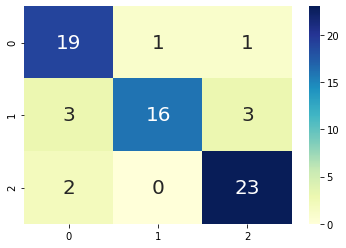

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(result_df['true_category'], result_df['predicted_category'])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print('F1 Score: ', f1_score(result_df['true_category'], result_df['predicted_category'], average='macro'))
print('Accuracy: ', accuracy_score(result_df['true_category'], result_df['predicted_category']))
print('Precision: ', precision_score(result_df['true_category'], result_df['predicted_category'], average='macro'))

# EXTRA: Text Augmentation (GPT-2)

In [ ]:
%tensorflow_version 1.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 311Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 96.3Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, 413Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:07, 67.6Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 262Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 146Mit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:00, 130Mit/s]                                                       


In [ ]:
file_name = "/content/dataset_sentimentos_traduzido.csv"

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=500,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=40,
              save_every=100
              )

In [ ]:
gpt2.generate_to_file(sess,
                      destination_path='dataset_sentimentos_augmented.txt',
                      length=2000,
                      temperature=0.7,
                      nsamples=300,
                      batch_size=20
                      )

In [ ]:
data = data.drop(['tweet_id', 'author'], axis=1)

In [ ]:
data['sentiment'].unique()

In [ ]:
data = data.sample(frac = 1).reset_index(drop=True).iloc[0:300]
data

,sentiment,content
0,happiness,@MrAhrenSean lol! ok ok it is a little absurd....
1,happiness,@kelsie_marie1 hey beautiful whats up?
2,happiness,i am listening this song &quot;shattered&quot;...
3,sadness,is way too sleepy to be awake
4,happiness,"Wow, Hugh Jackman TOTALLY bulked up for Wolver..."
...,...,...
295,happiness,Bumping Air Supply's Greastest Hits
296,sadness,@msdivineknight wish i could want to stay and...
297,happiness,@KeepinUpWKris hope you have a great day tomor...
298,sadness,@BeateVeronica I'm jealous - I would love deer...


In [ ]:
data = data[data['sentiment']!='empty']
data = data[data['sentiment']!='enthusiasm']
data = data[data['sentiment']!='love']
data = data[data['sentiment']!='neutral']
data = data[data['sentiment']!='worry']
data = data[data['sentiment']!='surprise']
data = data[data['sentiment']!='hate']
data = data[data['sentiment']!='boredom']
data = data[data['sentiment']!='relief']
data = data[data['sentiment']!='fun']

In [ ]:
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data

,content,sentiment
0,@MrAhrenSean lol! ok ok it is a little absurd....,happiness
1,@kelsie_marie1 hey beautiful whats up?,happiness
2,i am listening this song &quot;shattered&quot;...,happiness
3,is way too sleepy to be awake,sadness
4,"Wow, Hugh Jackman TOTALLY bulked up for Wolver...",happiness
...,...,...
295,Bumping Air Supply's Greastest Hits,happiness
296,@msdivineknight wish i could want to stay and...,sadness
297,@KeepinUpWKris hope you have a great day tomor...,happiness
298,@BeateVeronica I'm jealous - I would love deer...,sadness


In [ ]:
data.to_csv('ataset_sentimentos_augmented.csv')